# Using Pandas to Estimate Recharge: Week 3


For the rest of the semester, we are going to start focusing on specific hydrogeologic issues and how we can apply Python to resolve these issues. This week, we are going to focus on a (relatively) simple example of how to estimate recharge from hydrographs. Specifically, we will use the Pandas Data Science library to:

<ul>
    <li>Import data from CSV files</li>
    <li>Plot the data</li>
    <li>Perform calculations on time series data</li>
</ul>

Let's import the libraries that we are going to use today.

In [0]:
# import pandas with alias pd
import pandas as pd
# import matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline

# Today's hydrogeologic issue: Estimating Recharge

This week, we are going to keep working with hydrographs; specifically, we are going to use a hydrograph to estimate groundwater recharge. The analysis is known as the Water Table Fluctuation method. See the following link for more details:

![WTF_method](https://water.usgs.gov/ogw/gwrp/methods/images/figure2.gif)

https://water.usgs.gov/ogw/gwrp/methods/wtf/
https://www.sciencedirect.com/science/article/pii/S0022169406005427

The general idea of this approach is to apply transient mass balance concepts to estimate recharge with the following formula:

$R=\frac{\Delta h S_y}{\Delta t}$

where $R$ is recharge ($ft/d$), $\Delta h$ is change in head ($ft$), $S_y$ is specific yield (unitless), and $\Delta t$ is the time interval over which the head change was observed ($d$). We are going to use the simplest variant of the Water Table Fluctuation method (used by the USGS RISE program), where daily rises in water levels are used to define $\Delta h$. Where heads decreased over a day, recharge is assumed to be zero. This approach is expected to underestimate recharge, but is very easy to code in Python!!! I encourage you to take a closer look at the work by Delin (referenced above) to understand the details of this approach better. 

For this week, let's use the Water Table Fluctuation Method on a data set from for a monitoring well in the Imperial Valley (https://www.isws.illinois.edu/groundwater-science/groundwater-monitoring-well-networks/imperial-valley).

# Pandas

The Python Data Analysis Library, or Pandas, is an open source library providing high-performance, easy-to-use data structures and data analysis tools for Python.

https://pandas.pydata.org/

<img src = "https://d1o50x50snmhul.cloudfront.net/wp-content/uploads/2017/06/14111650/00000-00568744-800x533.jpg"/>

### Pandas as an Excel substitute

Pandas allows for much of the same functionality as Excel. Pandas has a data type called `DataFrame` that works on the same principle of rows and columns as excel. Each row has an index, and each column has a heading. It is relatively simple to read an Excel file as a DataFrame into Python with Pandas using the `pd.read_excel()` function. Similar in functionality, we can also read a CSV file as a DataFrame using `pd.read_csv()`. 

In [0]:
# this will read a csv file from the ISWS website, includes a time-stamp, depth to water, and head. 
head_csv = 'http://aqueduct.isws.illinois.edu/data/360669_MTOW-03_WILDLIFE-REFUGE_hyd.csv'
wellhead = pd.read_csv(head_csv)
print(wellhead)

       RECORD            TIMESTAMP  depth_to_water_from_land_surface    head
0           0  2016-12-14 04:00:00                             17.20  473.61
1           1  2016-12-14 05:00:00                             17.19  473.62
2           2  2016-12-14 06:00:00                             17.20  473.61
3           3  2016-12-14 07:00:00                             17.20  473.61
4           4  2016-12-14 10:00:00                             17.20  473.61
...       ...                  ...                               ...     ...
27436   27450  2020-02-04 19:00:00                             15.90  474.91
27437   27451  2020-02-04 20:00:00                             15.91  474.90
27438   27452  2020-02-04 21:00:00                             15.91  474.90
27439   27453  2020-02-04 22:00:00                             15.90  474.91
27440   27454  2020-02-04 23:00:00                             15.91  474.90

[27441 rows x 4 columns]


In [0]:
# let's confirm that the data type is "DataFrame"
type(wellhead)

pandas.core.frame.DataFrame

The original column names leave something to be desired. `depth_to_water_from_land_surface` is a lengthy column name that you probably wouldn't want to type repeatedly into a code. While brief, `head` is actually a method that returns the first few lines of a DataFrame, so it is unwise to also have a column named this. Let's rename the column headings using the `rename` method:

In [0]:
# the format below specifies how to rename the columns in what is called a "dictionary". We'll talk specifics of dictionaries later in the semester.
wellhead = wellhead.rename(columns={"RECORD": "record", "TIMESTAMP": 'time', "depth_to_water_from_land_surface": "dtw_ft", "head": "head_ft"})
print(wellhead)

       record                 time  dtw_ft  head_ft
0           0  2016-12-14 04:00:00   17.20   473.61
1           1  2016-12-14 05:00:00   17.19   473.62
2           2  2016-12-14 06:00:00   17.20   473.61
3           3  2016-12-14 07:00:00   17.20   473.61
4           4  2016-12-14 10:00:00   17.20   473.61
...       ...                  ...     ...      ...
27436   27450  2020-02-04 19:00:00   15.90   474.91
27437   27451  2020-02-04 20:00:00   15.91   474.90
27438   27452  2020-02-04 21:00:00   15.91   474.90
27439   27453  2020-02-04 22:00:00   15.90   474.91
27440   27454  2020-02-04 23:00:00   15.91   474.90

[27441 rows x 4 columns]


As you can see above, all columns are imported into the DataFrame. If you want to work with a single column within a DataFrame, it is relatively simple using the format `DataFrame.ColumnName`. This single set of data is referred to as a Series in Pandas. Note below that the Data Series contains the same indices as the DataFrame. 

In [0]:
#DataFrame.ColumnName
# This is case sensitive, so care should be taken when naming Excel columns for later input into Pandas
print(wellhead.head_ft)

0        473.61
1        473.62
2        473.61
3        473.61
4        473.61
          ...  
27436    474.91
27437    474.90
27438    474.90
27439    474.91
27440    474.90
Name: head_ft, Length: 27441, dtype: float64


We can also access individual entries in the DataFrame (note that there are multiple ways to do the same thing). The following code accesses the head in the third row. Note that the row position is the same as the index (2), but this is a special case. 

In [0]:
print(wellhead.head_ft[2])
print(wellhead['head_ft'][2])
print(wellhead['head_ft'].loc[2]) # selects by label
print(wellhead['head_ft'].iloc[2]) # selects by index position

473.61
473.61
473.61
473.61


When working with Pandas, we often want to assign a specific column to serve as our index. In this class, we will often assign the time column to the index, which opens up a number of time series analyses options. Before we make this change, though, let's take a quick look at the data type of the times in the column.

In [0]:
print(wellhead.time[0])
print(type(wellhead.time[0]))

2016-12-14 04:00:00
<class 'str'>


As you may have found out the hard way in Excel, working with date times in strings can be very complicated (to say the least). Pandas has a function that converts a date-time string into a `DateTime Object`. The function is intellegent enough to recognize the format of most date-time strings with little user input. Once in this format, Pandas can perform a number of time-series analyses such as binning over different time intervals (known as resampling in Pandas) and interpolation. 

In [0]:
wellhead.time = pd.to_datetime(wellhead.time)
print(wellhead.time[0])
print(type(wellhead.time[0]))

2016-12-14 04:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


Now that the time is formatted properly, we can assign the time column as the index of our dataframe. This is done by setting `df.index = df.columnname`, as seen below. 

In [0]:
wellhead.index = wellhead.time
print(wellhead)

                     record                time  dtw_ft  head_ft
time                                                            
2016-12-14 04:00:00       0 2016-12-14 04:00:00   17.20   473.61
2016-12-14 05:00:00       1 2016-12-14 05:00:00   17.19   473.62
2016-12-14 06:00:00       2 2016-12-14 06:00:00   17.20   473.61
2016-12-14 07:00:00       3 2016-12-14 07:00:00   17.20   473.61
2016-12-14 10:00:00       4 2016-12-14 10:00:00   17.20   473.61
...                     ...                 ...     ...      ...
2020-02-04 19:00:00   27450 2020-02-04 19:00:00   15.90   474.91
2020-02-04 20:00:00   27451 2020-02-04 20:00:00   15.91   474.90
2020-02-04 21:00:00   27452 2020-02-04 21:00:00   15.91   474.90
2020-02-04 22:00:00   27453 2020-02-04 22:00:00   15.90   474.91
2020-02-04 23:00:00   27454 2020-02-04 23:00:00   15.91   474.90

[27441 rows x 4 columns]


Now let's return to our earlier code to access the head in the third row. Note how this differs from before, given that the index is no longer the same as the row position. Here, I assign the actual index value for the third row (`2016-12-14 06:00:00`) for all cases except `.iloc`, which requires the actual row position and not the value assigned to the index. 

In [0]:
print(wellhead.head_ft['2016-12-14 06:00:00'])
print(wellhead['head_ft']['2016-12-14 06:00:00'])
print(wellhead['head_ft'].loc['2016-12-14 06:00:00']) # selects by label
print(wellhead['head_ft'].iloc[2]) # selects by index position

473.61
473.61
473.61
473.61


Finally, we are no longer going to use the data in the columns `record` or `time` (since time is in the index). Let's drop those columns as follows 

In [0]:
# note that the first argument defines the columns to be dropped, and the second argument defines if the row or column will be dropped (axis = 1 indicates that columns will be dropped)
wellhead = wellhead.drop(['record','time'], axis=1)
print(wellhead)

                     dtw_ft  head_ft
time                                
2016-12-14 04:00:00   17.20   473.61
2016-12-14 05:00:00   17.19   473.62
2016-12-14 06:00:00   17.20   473.61
2016-12-14 07:00:00   17.20   473.61
2016-12-14 10:00:00   17.20   473.61
...                     ...      ...
2020-02-04 19:00:00   15.90   474.91
2020-02-04 20:00:00   15.91   474.90
2020-02-04 21:00:00   15.91   474.90
2020-02-04 22:00:00   15.90   474.91
2020-02-04 23:00:00   15.91   474.90

[27441 rows x 2 columns]


### Plotting with Pandas

Before moving on with our analysis , let's take a quick look at plotting data. Plotting with a Pandas DataFrame or Series can be done by simpling using `DataFrame.columnname.plot()`. When plotting this way, Python knows to plot the index on the x-axis and all other columns on the y-axis. Note that the label defaults to the columnn name, although this can always be re-assigned as normal. 

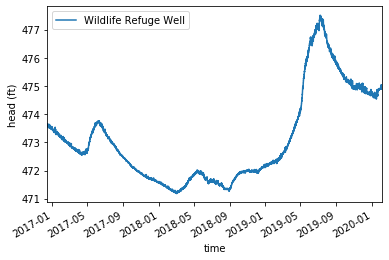

In [0]:
# plot a line 
wellhead.head_ft.plot(label = 'Wildlife Refuge Well')
# we can plot a legend without assigning labels; labels are the same as the Data Series names.
plt.legend()
plt.ylabel('head (ft)')
plt.xticks(rotation=30)
plt.show()

### Calculating $\Delta h$

Now let's return to our original problem, using the hydrograph to determine recharge. The first step we need to resolve is calculating the change in head over a time period, $\Delta h$. The USGS RISE method uses a daily time scale, so let's resample the data to give us the daily average of the heads. 



In [0]:
# the syntax is a little different here. We are instructing Pandas to resample of a daily interval (here indicated by the argument 'D'). Other options could include weekly ('W'), monthly ('M'), or yearly ('Y').
# we also add another method, mean(), which simply instructs Pandas to combine the hourly data into daily data by taking the mean. 
wellhead_d = wellhead.resample('D').mean()
print(wellhead_d)

               dtw_ft     head_ft
time                             
2016-12-14  17.203333  473.606667
2016-12-15  17.209000  473.601000
2016-12-16  17.164000  473.646000
2016-12-17        NaN         NaN
2016-12-18  17.270833  473.539167
...               ...         ...
2020-01-31  15.871667  474.938333
2020-02-01  15.833333  474.976667
2020-02-02  15.806250  475.003750
2020-02-03  15.797917  475.012083
2020-02-04  15.879583  474.930417

[1148 rows x 2 columns]


For another example of resampling (from the financial world), check out this video, which has some example files for you to play around with: https://www.youtube.com/watch?v=r0s4slGHwzE


Let's check that the resampled data is similar to the original data. You will notice that the sharp peaks and valleys are lost due to averaging, which isn't ideal but we will live with it. 

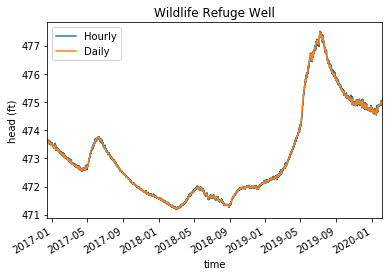

In [0]:
# plot a line at a time
wellhead.head_ft.plot(label = 'Hourly')
wellhead_d.head_ft.plot(label = 'Daily')
plt.title('Wildlife Refuge Well')
# we can plot a legend without assigning labels; labels are the same as the Data Series names.
plt.legend()
plt.ylabel('head (ft)')
plt.xticks(rotation=30)
plt.show()

Now that we have resampled, we need to calculate the difference in the average heads over each weekly interval. To do this, we simply take the difference between the head and the shifted head using the method shift `shift()`. 

In [0]:
# let's take a quick look at what the .shift() method does
# all heads are shifted down one by this code
wellhead_d['head_ft'].shift()

time
2016-12-14           NaN
2016-12-15    473.606667
2016-12-16    473.601000
2016-12-17    473.646000
2016-12-18           NaN
                 ...    
2020-01-31    474.913750
2020-02-01    474.938333
2020-02-02    474.976667
2020-02-03    475.003750
2020-02-04    475.012083
Freq: D, Name: head_ft, Length: 1148, dtype: float64

In [0]:
# we can take the difference between the shifted and original heads to get the head change over each day
# note that this simply involves subtracting two data series, which performs an element by element subtraction as long as they are the same length!
# we create a new column, 'delta_h' and set that equal to this difference
# after running the code, print the results to convince yourself that the magnitude and direction of the head change are correct
wellhead_d['delta_h'] = wellhead_d['head_ft']-wellhead_d['head_ft'].shift()
print(wellhead_d)

               dtw_ft     head_ft   delta_h
time                                       
2016-12-14  17.203333  473.606667       NaN
2016-12-15  17.209000  473.601000 -0.005667
2016-12-16  17.164000  473.646000  0.045000
2016-12-17        NaN         NaN       NaN
2016-12-18  17.270833  473.539167       NaN
...               ...         ...       ...
2020-01-31  15.871667  474.938333  0.024583
2020-02-01  15.833333  474.976667  0.038333
2020-02-02  15.806250  475.003750  0.027083
2020-02-03  15.797917  475.012083  0.008333
2020-02-04  15.879583  474.930417 -0.081667

[1148 rows x 3 columns]


Notice that there are a few NaNs present, which complicate the math. These are likely a result of erroneous head measurements that have prevented the calculation of an average (examples might include an error code that is returned as a string). The first NaN is a result of our methodology for shifting heads to calculate head change over the day. These NaNs will wreak havoc on our next coding steps. Ideally, we would address the underlying issue with these NaNs. For our purposes, however, we are going to simply fill them in with numbers so we don't have to worry about them. 

The easiest way to do this is the method `fillna`. Since our first value is an NaN, and our last value is a float, let's use backward fill (`bfill`) as the argument to determine how NaNs are populated. This will simply assign the value of the next float to any NaN. As you can probably guess, we can also do forward fill (`ffill`), which grabs the value of the preceding float, but that would leave an NaN in our dataframe, which we don't want. 

In [0]:
wellhead_d = wellhead_d.fillna(method='bfill')
print(wellhead_d)

               dtw_ft     head_ft   delta_h
time                                       
2016-12-14  17.203333  473.606667 -0.005667
2016-12-15  17.209000  473.601000 -0.005667
2016-12-16  17.164000  473.646000  0.045000
2016-12-17  17.270833  473.539167  0.028167
2016-12-18  17.270833  473.539167  0.028167
...               ...         ...       ...
2020-01-31  15.871667  474.938333  0.024583
2020-02-01  15.833333  474.976667  0.038333
2020-02-02  15.806250  475.003750  0.027083
2020-02-03  15.797917  475.012083  0.008333
2020-02-04  15.879583  474.930417 -0.081667

[1148 rows x 3 columns]


# Estimating Recharge

Now that we have $\Delta h$, we can easily calculate recharge by assigning $S_y$ as 0.2 (unitless) and $\Delta t$ as 1 day. Recall from earlier that:

$R=\frac{\Delta h S_y}{\Delta t}$

Given our previous discussions, you might expect this to involve a loop, but if you multiple a scalar by a data series, the multiplication operation occurs over each element of the data series. In other words, no loop is needed, and the following code works!

In [0]:
sy = 0.2
wellhead_d['recharge'] = sy*wellhead_d.delta_h
print(wellhead_d)

               dtw_ft     head_ft   delta_h  recharge
time                                                 
2016-12-14  17.203333  473.606667 -0.005667 -0.001133
2016-12-15  17.209000  473.601000 -0.005667 -0.001133
2016-12-16  17.164000  473.646000  0.045000  0.009000
2016-12-17  17.270833  473.539167  0.028167  0.005633
2016-12-18  17.270833  473.539167  0.028167  0.005633
...               ...         ...       ...       ...
2020-01-31  15.871667  474.938333  0.024583  0.004917
2020-02-01  15.833333  474.976667  0.038333  0.007667
2020-02-02  15.806250  475.003750  0.027083  0.005417
2020-02-03  15.797917  475.012083  0.008333  0.001667
2020-02-04  15.879583  474.930417 -0.081667 -0.016333

[1148 rows x 4 columns]


Since we are using the RISE version of the Water Table Fluctuation Method, our next step is to remove any negative recharge. Given our previous discussions, you might expect that a loop would be necessary, and indeed, it works!

Note that we use a method called iterrows. There are some other nuances here (for example, it is not good practice to make changes to a dataframe that you are looping through, so we create a different dataframe to modify). 

There is much, much more to be said, and we will conduct these types of loops later in the semester. However, there is a much easier way to accomplish the same thing!

In [0]:
wellhead_d_noneg = 1*wellhead_d
for index, row in wellhead_d.iterrows():
  if wellhead_d_noneg.recharge[index]<0:
    wellhead_d_noneg.recharge[index]=0

print(wellhead_d_noneg)

               dtw_ft     head_ft   delta_h  recharge
time                                                 
2016-12-14  17.203333  473.606667 -0.005667  0.000000
2016-12-15  17.209000  473.601000 -0.005667  0.000000
2016-12-16  17.164000  473.646000  0.045000  0.009000
2016-12-17  17.270833  473.539167  0.028167  0.005633
2016-12-18  17.270833  473.539167  0.028167  0.005633
...               ...         ...       ...       ...
2020-01-31  15.871667  474.938333  0.024583  0.004917
2020-02-01  15.833333  474.976667  0.038333  0.007667
2020-02-02  15.806250  475.003750  0.027083  0.005417
2020-02-03  15.797917  475.012083  0.008333  0.001667
2020-02-04  15.879583  474.930417 -0.081667  0.000000

[1148 rows x 4 columns]


To understand the briefer (more `Pythonic`) way of removing negative values, you first need to see what happens when we write the following condition- which asks what happens if a data series is less than zero? That might sounds like an odd question, but Pandas recognizes that this is an element by element comparison, and returns a data series populated by either True (if an element is less than zero) or False (if an element is greater than or equal to zero). 

In [0]:
# note that the following line of code returns whether the following expression is true or not
wellhead_d.recharge<0

time
2016-12-14     True
2016-12-15     True
2016-12-16    False
2016-12-17    False
2016-12-18    False
              ...  
2020-01-31    False
2020-02-01    False
2020-02-02    False
2020-02-03    False
2020-02-04     True
Freq: D, Name: recharge, Length: 1148, dtype: bool

The results of this Boolean can then be fed back into the DataFrame, with the resulting selection being only those values that are true. These values can then be set as equal to zero and are updated in the dataframe. 

Although a little confusing at first, this is a powerful way to check for outliers or other oddities in a dataframe or dataseries.

In [0]:
# The results of this code include indices and can be fed back into the original dataframe. In the following expression, only values that are true (values where the change in head is less than zero) will be set to zero.

# note that this code actually updates wellhead_d and does not necessitate the creation of a new dataframe
wellhead_d.recharge[wellhead_d.recharge<0] = 0
print(wellhead_d)

               dtw_ft     head_ft   delta_h  recharge
time                                                 
2016-12-14  17.203333  473.606667 -0.005667  0.000000
2016-12-15  17.209000  473.601000 -0.005667  0.000000
2016-12-16  17.164000  473.646000  0.045000  0.009000
2016-12-17  17.270833  473.539167  0.028167  0.005633
2016-12-18  17.270833  473.539167  0.028167  0.005633
...               ...         ...       ...       ...
2020-01-31  15.871667  474.938333  0.024583  0.004917
2020-02-01  15.833333  474.976667  0.038333  0.007667
2020-02-02  15.806250  475.003750  0.027083  0.005417
2020-02-03  15.797917  475.012083  0.008333  0.001667
2020-02-04  15.879583  474.930417 -0.081667  0.000000

[1148 rows x 4 columns]


### Plot head and recharge data

We want to observe the relationship between head changes and recharge. Let's plot both up. Note that we add a title based on the original url. 

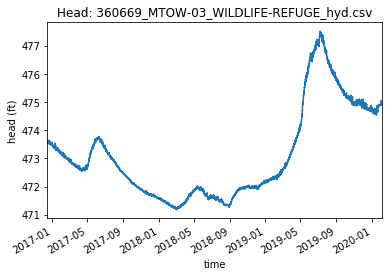

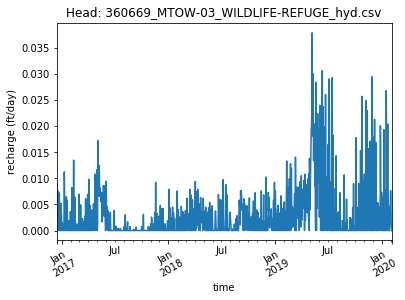

In [0]:
# plot a line at a time
wellhead.head_ft.plot()
plt.title("Head: "+ head_csv[39:])
plt.ylabel('head (ft)')
plt.xticks(rotation=30)
plt.show()

plt.figure()
plt.title("Head: "+ head_csv[39:])
wellhead_d.recharge.plot()
plt.ylabel('recharge (ft/day)')
plt.xticks(rotation = 30)
plt.show()


This view is a little too noisy to see the trends in recharge, so let's resample over a monthly time period to smooth out the recharge.

In [0]:
wellhead_m = wellhead_d.resample('M').mean()
print(wellhead_m)

               dtw_ft     head_ft   delta_h  recharge
time                                                 
2016-12-31  17.260655  473.549345  0.003032  0.002950
2017-01-31  17.488048  473.321952 -0.010659  0.001417
2017-02-28  17.766458  473.043527 -0.007738  0.001595
2017-03-31  18.030578  472.779422 -0.009839  0.001185
2017-04-30  18.175722  472.634278  0.001458  0.002575
2017-05-31  17.535927  473.274046  0.029758  0.006323
2017-06-30  17.205514  473.604486 -0.007042  0.001278
2017-07-31  17.697769  473.112231 -0.015914  0.000054
2017-08-31  18.141237  472.668763 -0.014341  0.000237
2017-09-30  18.500250  472.309750 -0.011333  0.000042
2017-10-31  18.794798  472.015175 -0.007715  0.000194
2017-11-30  19.011611  471.798361 -0.005833  0.001192
2017-12-31  19.156922  471.653078 -0.004637  0.000710
2018-01-31  19.319395  471.490605 -0.004677  0.001212
2018-02-28  19.508051  471.301949 -0.006830  0.001042
2018-03-31  19.500027  471.309973  0.006331  0.002188
2018-04-30  19.149264  471.6

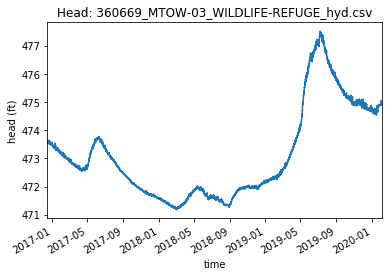

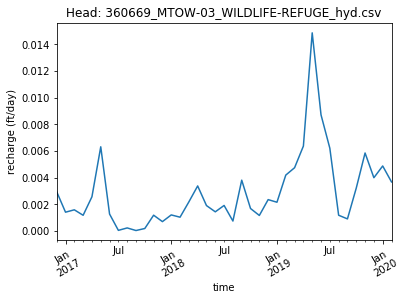

In [0]:
# plot a line at a time
wellhead.head_ft.plot()
plt.title("Head: "+ head_csv[39:])
plt.ylabel('head (ft)')
plt.xticks(rotation=30)
plt.show()

plt.figure()
plt.title("Head: "+ head_csv[39:])
wellhead_m.recharge.plot()
plt.ylabel('recharge (ft/day)')
plt.xticks(rotation = 30)
plt.show()


Finally, I want to compare the annual average recharge with the recharge that was calibrated in a modeling effort of this region. Roadcap et al. (2011) found that recharge ranged from 8-13 inches/year. Let's resample and conduct a unit conversion:

In [0]:
wellhead_y = wellhead_d.resample('Y').mean()*12*365.25
print(wellhead_y)

                  dtw_ft       head_ft    delta_h   recharge
time                                                        
2016-12-31  75653.451868  2.075567e+06  13.291042  12.929850
2017-12-31  79451.870616  2.071768e+06 -23.210887   6.135399
2018-12-31  83895.008003  2.067325e+06   7.310003   8.371730
2019-12-31  70295.126131  2.080925e+06  30.330760  22.849988
2020-12-31  70301.180679  2.080919e+06  28.176429  20.808814


2016, 2017, and 2018 are very close to the modeled recharge estimate of 8-13 inches/year. 2019 was an extrodinarily wet year in the region, so the fact that the recharge is higher makes sense. 2020 has also been relatively wet to start out, so the higher recharge rates makes sense here as well. 

## Code summary

The above code is fairly messy with a few tangents to explain what is occuring. The following three code blocks summarize the core code needed to simulate the Water Table Fluctuation method for any ISWS hydrograph. 

<ul>
<li>The first block defines variables that the user may need to change frequently</li>
<li>The second block reads the hydrograph information, formats the data, and plots the yearly average recharge in inches/year.</li>
<li>The third block plots the data together on the same plot</li>
</ul>

In [0]:
# Code Block 1 defines variable information
# Link to hydrograph data
head_csv = 'http://aqueduct.isws.illinois.edu/data/360669_MTOW-03_WILDLIFE-REFUGE_hyd.csv'
# Specific Yield (storage term)
sy = 0.2

In [0]:
# read the csv as a dataframe
wellhead = pd.read_csv(head_csv)
# rename the column names
wellhead = wellhead.rename(columns={"RECORD": "record", "TIMESTAMP": 'time', "depth_to_water_from_land_surface": "dtw_ft", "head": "head_ft"})
# convert date string to date time
wellhead.time = pd.to_datetime(wellhead.time)
# assign datetime as index
wellhead.index = wellhead.time
# drop unneeded columns- not necessary but done to create cleaner looking outputs
wellhead = wellhead.drop(['record','time'],axis=1) 
# resample on a daily time interval, averaging values in the dataframe
wellhead_d = wellhead.resample('D').mean()
# calculate head change over each day
wellhead_d['delta_h'] = wellhead_d['head_ft']-wellhead_d['head_ft'].shift()
# fill NaNs in the dataframe
wellhead_d = wellhead_d.fillna(method='bfill')
# add a recharge column by calculating head change by specific yield. Note that the value is not divided by time because the time interval is 1 day. 
wellhead_d['recharge'] = sy*wellhead_d.delta_h
# replace negative recharge values with zero
wellhead_d.recharge[wellhead_d.recharge<0]=0
# resample to monthly time intervals
wellhead_m = wellhead_d.resample('M').mean()
# resample to annual time intervals
wellhead_y = wellhead_d.resample('Y').mean()
# print annual data as inches/year
print(wellhead_y.recharge*12*365.25)


time
2016-12-31    12.929850
2017-12-31     6.135399
2018-12-31     8.371730
2019-12-31    22.849988
2020-12-31    20.808814
Freq: A-DEC, Name: recharge, dtype: float64


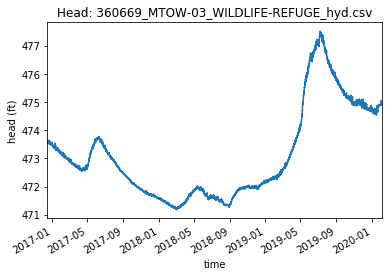

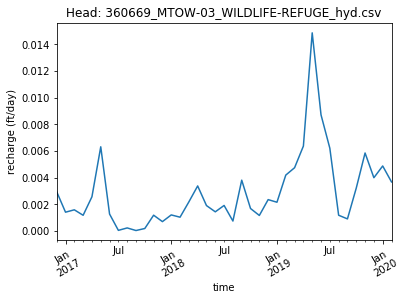

In [0]:
# plot a line at a time
wellhead.head_ft.plot()
plt.title("Head: "+ head_csv[39:])
plt.ylabel('head (ft)')
plt.xticks(rotation=30)
plt.show()

plt.figure()
plt.title("Head: "+ head_csv[39:])
wellhead_m.recharge.plot()
plt.ylabel('recharge (ft/day)')
plt.xticks(rotation = 30)
plt.show()